In [1]:
# import needed libraries
import numpy as np 
import cv2 
import os 
from PIL import Image
import keras

# Importing data 

In [2]:
images_directory = 'processed_data_230files_2filters_2classes/Training/'    # directory to folder with dataset
dataset=[]                             # list to keep the images
labels = []                            # list to keep the values of the labels
SIZE = 150

positive_images = os.listdir(images_directory + 'positive/')
for i, image_name in enumerate(positive_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(images_directory + 'positive/' +image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        labels.append(0)
        
negative_images = os.listdir(images_directory + 'negative/')
for i, image_name in enumerate(negative_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(images_directory + 'negative/' +image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        labels.append(1)
    

# Building model 

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers.legacy import Adam

In [4]:
channels = 3
img_shape = (150, 150, channels)

model = Sequential()

# convolutional layer 1
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))    #droping out 25% of data to minimize overfitting

# convolutional layer 2
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))    #droping out 25% of data to minimize overfitting

#flattening
model.add(Flatten())

#Flatten the matrix to get it ready for den
model.add(Dense(64,activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))

#output layer
model.add(Dense(2, activation = "softmax"))

In [5]:
model.compile(Adam(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0

# training and evaluating model

Epoch 1/10


2024-05-05 11:48:26.723538: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


12/12 [==============================] - 1s 52ms/step - loss: 1.3085 - accuracy: 0.6783 - val_loss: 7.6341 - val_accuracy: 0.7692
Epoch 2/10
12/12 [==============================] - 1s 49ms/step - loss: 0.4322 - accuracy: 0.7652 - val_loss: 1.5240 - val_accuracy: 0.7692
Epoch 3/10
12/12 [==============================] - 1s 45ms/step - loss: 0.3134 - accuracy: 0.8522 - val_loss: 0.7191 - val_accuracy: 0.7692
Epoch 4/10
12/12 [==============================] - 1s 45ms/step - loss: 0.3570 - accuracy: 0.9043 - val_loss: 0.6785 - val_accuracy: 0.8462
Epoch 5/10
12/12 [==============================] - 1s 45ms/step - loss: 0.2771 - accuracy: 0.8522 - val_loss: 0.5942 - val_accuracy: 0.7692
Epoch 6/10
12/12 [==============================] - 1s 46ms/step - loss: 0.2047 - accuracy: 0.9217 - val_loss: 0.5521 - val_accuracy: 0.7692
Epoch 7/10
12/12 [==============================] - 1s 45ms/step - loss: 0.1426 - accuracy: 0.9565 - val_loss: 0.5325 - val_accuracy: 0.6923
Epoch 8/10
12/12 [======

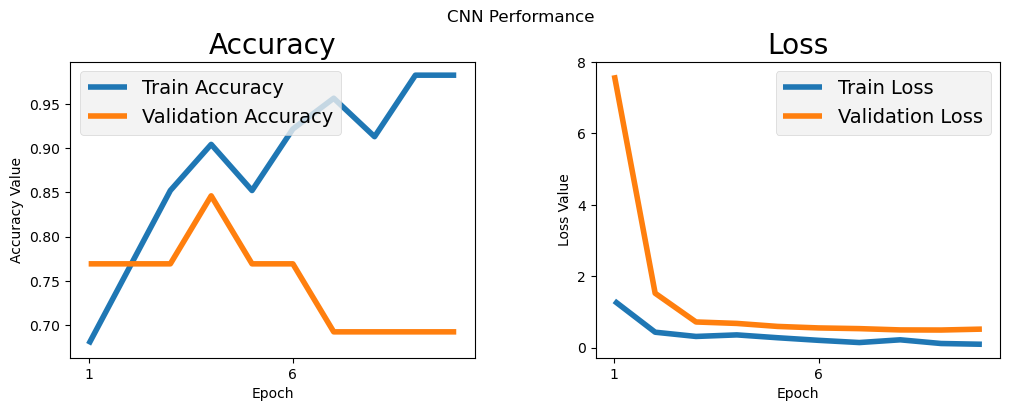

In [6]:
# fit the data to the model

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(dataset,     #list with images
                                                    to_categorical(np.array(labels)),  #converting array to binary class matrix
                                                    test_size= 0.20, 
                                                    random_state= 0)
#fitting the model
history = model.fit(np.array(X_train), y_train, 
                    batch_size =10, verbose=1, 
                    epochs=10, validation_split=0.1, 
                   shuffle=True)

model.save('CNN_290424.hdf5')

print( "Test_Accuracy: {:.2f}%". format (model. evaluate(np.array(X_test), np. array(y_test)) [1]*100))

f,(ax1, ax2) = plt. subplots(1, 2, figsize=(12, 4))
plt.style.use('fivethirtyeight')
t = f.suptitle('CNN Performance', fontsize=12)
f. subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1, max_epoch) )
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel( 'Accuracy Value')
ax1.set_xlabel( 'Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label= 'Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

1/1 [==============================] - 0s 87ms/step


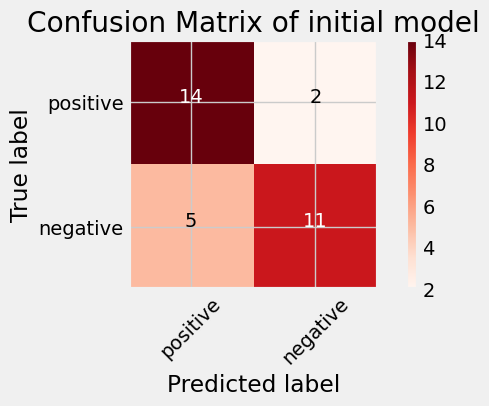

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Make predictions on test data
predicted_probs = model.predict(np.array(X_test))
predicted_labels = np.argmax(predicted_probs, axis=1)

# Convert one-hot encoded true labels back to categorical labels
true_labels = np.argmax(y_test, axis=1)


# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap=plt.cm.Reds)
plt.title('Confusion Matrix of initial model')
plt.colorbar()

classes = ['positive', 'negative'] 
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Print the confusion matrix values
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# adding image data generator 

In [8]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 3

train_datagen = ImageDataGenerator()

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        'processed_data_230files_2filters_2classes/Training',  # this is the input directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        'processed_data_230files_2filters_2classes/Testing',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

Found 160 images belonging to 2 classes.
Found 65 images belonging to 2 classes.


# fitting model with augmented data

In [9]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_augmented = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=10,
        validation_data=validation_generator,
        validation_steps=len(validation_generator))

Epoch 1/10
 1/54 [..............................] - ETA: 10s - loss: 6.1150 - accuracy: 0.0000e+00

2024-05-05 11:48:33.132596: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


54/54 [==============================] - 1s 24ms/step - loss: 1.2784 - accuracy: 0.5813 - val_loss: 0.4940 - val_accuracy: 0.8154
Epoch 2/10


2024-05-05 11:48:34.420785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


54/54 [==============================] - 1s 23ms/step - loss: 0.6190 - accuracy: 0.6500 - val_loss: 0.6167 - val_accuracy: 0.7385
Epoch 3/10
54/54 [==============================] - 1s 23ms/step - loss: 0.6176 - accuracy: 0.7063 - val_loss: 0.4967 - val_accuracy: 0.7846
Epoch 4/10
54/54 [==============================] - 1s 24ms/step - loss: 0.5922 - accuracy: 0.7063 - val_loss: 0.7624 - val_accuracy: 0.7538
Epoch 5/10
54/54 [==============================] - 1s 24ms/step - loss: 0.6135 - accuracy: 0.7063 - val_loss: 0.3911 - val_accuracy: 0.8308
Epoch 6/10
54/54 [==============================] - 1s 24ms/step - loss: 0.4273 - accuracy: 0.7937 - val_loss: 0.5534 - val_accuracy: 0.7846
Epoch 7/10
54/54 [==============================] - 1s 25ms/step - loss: 0.5675 - accuracy: 0.7250 - val_loss: 0.4084 - val_accuracy: 0.8154
Epoch 8/10
54/54 [==============================] - 1s 25ms/step - loss: 0.4860 - accuracy: 0.7875 - val_loss: 0.4093 - val_accuracy: 0.7846
Epoch 9/10
54/54 [======

# evaluation of the model with augmented data

In [10]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(validation_generator, steps=len(validation_generator))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")

22/22 [==============================] - 0s 7ms/step - loss: 0.5186 - accuracy: 0.7231
Test Accuracy: 72.31%
Test Loss: 0.518556535243988


2024-05-05 11:48:46.413694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


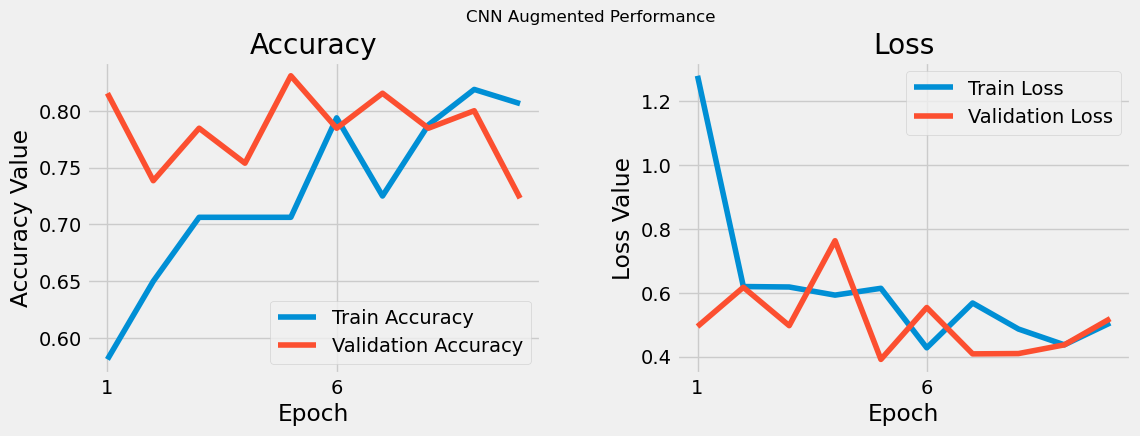

In [11]:
f,(ax1, ax2) = plt. subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Augmented Performance', fontsize=12)
f. subplots_adjust(top=0.85, wspace=0.3)

max_epoch1 = len(history_augmented.history['accuracy'])+1
epoch_list1 = list(range(1, max_epoch1) )
ax1.plot(epoch_list1, history_augmented.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list1, history_augmented.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch1, 5))
ax1.set_ylabel( 'Accuracy Value')
ax1.set_xlabel( 'Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list1, history_augmented.history['loss'], label='Train Loss')
ax2.plot(epoch_list1, history_augmented.history['val_loss'], label= 'Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch1, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

plt.show()

16/22 [====================>.........] - ETA: 0s

2024-05-05 11:48:46.766465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


22/22 [==============================] - 0s 7ms/step


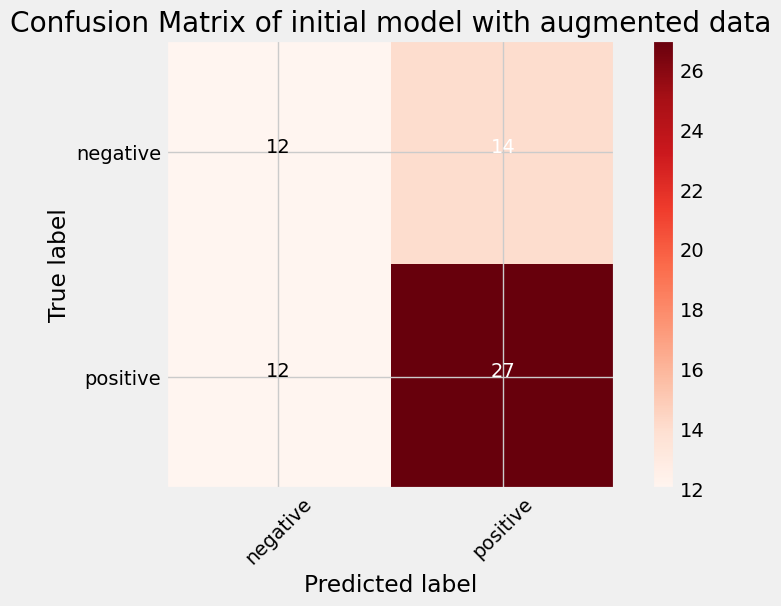

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools


# Get the true labels
true_labels = validation_generator.classes

# Get the predicted labels
predicted_probs = model.predict(validation_generator)
predicted_labels = np.argmax(predicted_probs, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Reds)
plt.title('Confusion Matrix of initial model with augmented data')
plt.colorbar()
classes = list(validation_generator.class_indices.keys())
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Print the confusion matrix values
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [13]:
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adamax
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# changing layers in CNN with new hyper-parameters

In [14]:
channels = 3
img_shape = (150, 150, channels)


class_count = len(list(train_generator.class_indices.keys())) # to define number of classes in dense layer

model_new = Sequential()

model_new.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape))
model_new.add(MaxPooling2D())
    
model_new.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model_new.add(MaxPooling2D())
    
model_new.add(Flatten())
    
model_new.add(Dense(64,activation = "relu"))
model_new.add(Dense(32,activation = "relu"))
model_new.add(Dense(class_count, activation = "softmax"))

In [15]:
model_new.compile(Adam(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 87616)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

# fitting new model with augmented data

In [16]:
epochs = 10   # number of all epochs in training

history_new = model_new.fit(train_generator, epochs= epochs, verbose= 1, validation_data= validation_generator, shuffle= False)

Epoch 1/10
 1/54 [..............................] - ETA: 9s - loss: 10.5157 - accuracy: 0.6667

2024-05-05 11:48:47.154835: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


52/54 [===========================>..] - ETA: 0s - loss: 17.3544 - accuracy: 0.6667

2024-05-05 11:48:48.425624: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


54/54 [==============================] - 1s 24ms/step - loss: 16.9321 - accuracy: 0.6687 - val_loss: 1.2291 - val_accuracy: 0.7231
Epoch 2/10
54/54 [==============================] - 1s 24ms/step - loss: 0.2834 - accuracy: 0.8687 - val_loss: 0.7907 - val_accuracy: 0.7077
Epoch 3/10
54/54 [==============================] - 1s 24ms/step - loss: 0.0492 - accuracy: 0.9937 - val_loss: 0.8296 - val_accuracy: 0.7538
Epoch 4/10
54/54 [==============================] - 1s 24ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.9886 - val_accuracy: 0.7692
Epoch 5/10
54/54 [==============================] - 1s 23ms/step - loss: 7.9268e-04 - accuracy: 1.0000 - val_loss: 1.2941 - val_accuracy: 0.7692
Epoch 6/10
54/54 [==============================] - 1s 24ms/step - loss: 1.4136e-04 - accuracy: 1.0000 - val_loss: 1.2271 - val_accuracy: 0.7692
Epoch 7/10
54/54 [==============================] - 1s 23ms/step - loss: 3.5691e-05 - accuracy: 1.0000 - val_loss: 1.3125 - val_accuracy: 0.7846
Epoch 8/10


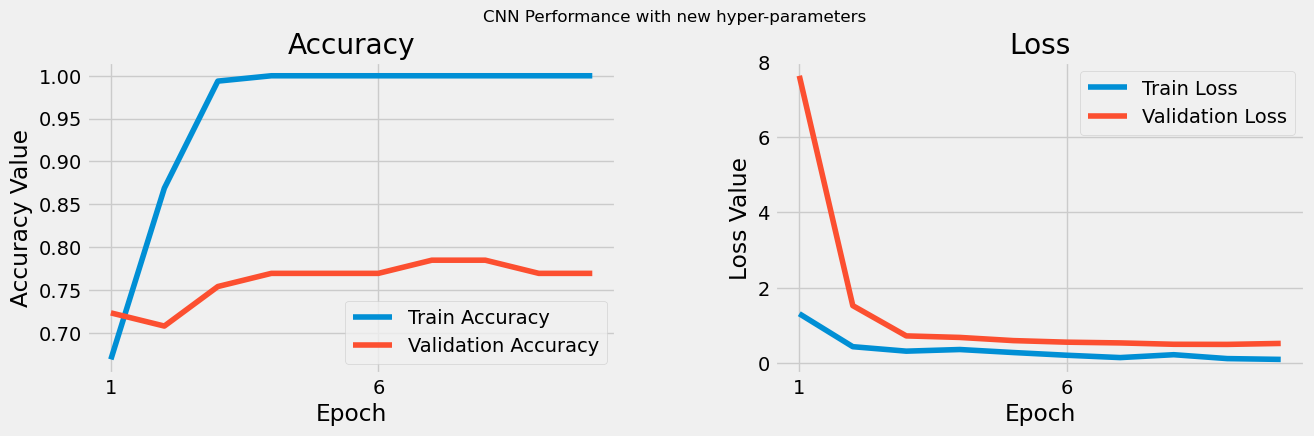

In [17]:
f,(ax1, ax2) = plt. subplots(1, 2, figsize=(14, 4))
t = f.suptitle('CNN Performance with new hyper-parameters', fontsize=12)
f. subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history_new.history['accuracy'])+1
epoch_list = list(range(1, max_epoch) )
ax1.plot(epoch_list, history_new.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_new.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel( 'Accuracy Value')
ax1.set_xlabel( 'Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label= 'Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_new.evaluate(validation_generator, steps=len(validation_generator))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")

22/22 [==============================] - 0s 8ms/step - loss: 1.3973 - accuracy: 0.7692
Test Accuracy: 76.92%
Test Loss: 1.3972543478012085


2024-05-05 11:49:00.469696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


22/22 [==============================] - 0s 7ms/step


2024-05-05 11:56:40.700119: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


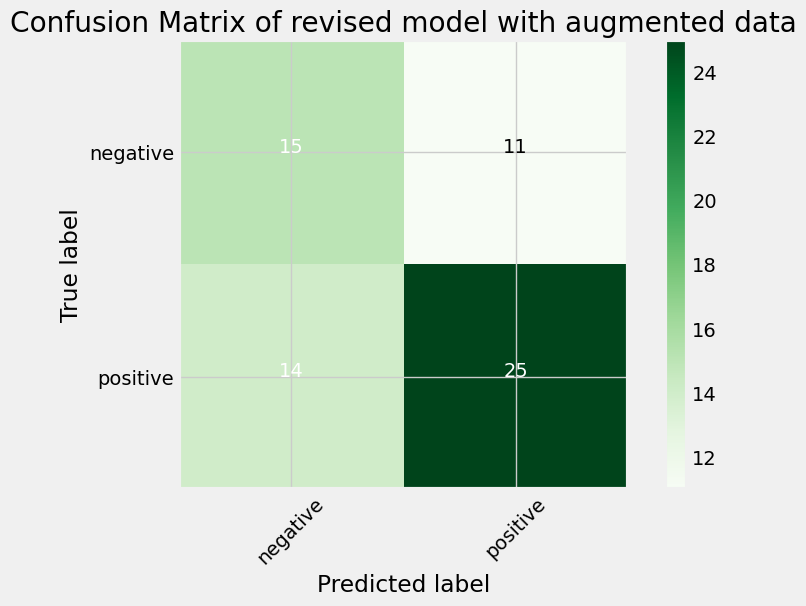

In [39]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools


# Get the true labels
true_labels = validation_generator.classes

# Get the predicted labels
predicted_probs = model_new.predict(validation_generator)
predicted_labels = np.argmax(predicted_probs, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Greens)
plt.title('Confusion Matrix of revised model with augmented data')
plt.colorbar()
classes = list(validation_generator.class_indices.keys())
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Print the confusion matrix values
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# Scaling up to 7k images

In [20]:
# import needed libraries
import numpy as np 
import cv2 
import os 
from PIL import Image
import keras
import pandas as pd

images_directory = 'processed_data_7k_2filters_4classes/Training'    # directory to folder with dataset
filepaths=[]                             # list to keep the images paths
labels = []                            # list to keep the values of the labels

# Get folders names
folds = os.listdir(images_directory)

for fold in folds:
    foldpath = os.path.join(images_directory, fold)
    filelist = os.listdir(foldpath)
    
    for file in filelist:
        filepath = os.path.join(foldpath, file)
        
        filepaths.append(filepath)
        labels.append(fold)
        
# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')

train_df = pd.concat([Fseries, Lseries], axis= 1)

In [21]:
train_df.shape

(5712, 2)

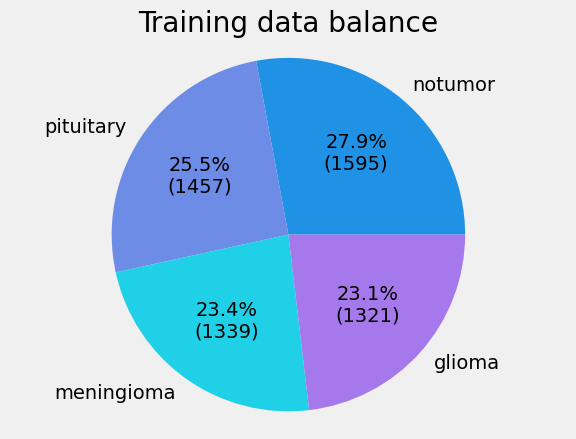

In [22]:
import matplotlib.pyplot as plt

data_balance = train_df.labels.value_counts()

def custom_autopct(pct):
    total = sum(data_balance)
    val = int(round(pct*total/100.0))
    return "{:.1f}%\n({:d})".format(pct, val)


# pie chart for data balance
plt.pie(data_balance, labels = data_balance.index, autopct=custom_autopct, colors = ["#2092E6","#6D8CE6","#20D0E6","#A579EB"])
plt.title("Training data balance")
plt.axis("equal")
plt.show()

In [23]:
# Generate data paths with labels
train_data_dir = 'processed_data_7k_2filters_4classes/Testing'
filepaths = []
labels = []

# Get folders names
folds = os.listdir(train_data_dir)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')

ts_df = pd.concat([Fseries, Lseries], axis= 1)

In [24]:
ts_df

filepaths      labels
0     processed_data_7k_2filters_4classes/Testing/pi...   pituitary
1     processed_data_7k_2filters_4classes/Testing/pi...   pituitary
2     processed_data_7k_2filters_4classes/Testing/pi...   pituitary
3     processed_data_7k_2filters_4classes/Testing/pi...   pituitary
4     processed_data_7k_2filters_4classes/Testing/pi...   pituitary
...                                                 ...         ...
1306  processed_data_7k_2filters_4classes/Testing/me...  meningioma
1307  processed_data_7k_2filters_4classes/Testing/me...  meningioma
1308  processed_data_7k_2filters_4classes/Testing/me...  meningioma
1309  processed_data_7k_2filters_4classes/Testing/me...  meningioma
1310  processed_data_7k_2filters_4classes/Testing/me...  meningioma

[1311 rows x 2 columns]

In [25]:
from sklearn.model_selection import train_test_split

# valid and test dataframe
valid_df, test_df = train_test_split(ts_df,  train_size= 0.5, shuffle= True, random_state= 42)

In [26]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (150, 150)

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()


train_gen = train_datagen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = test_datagen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = test_datagen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


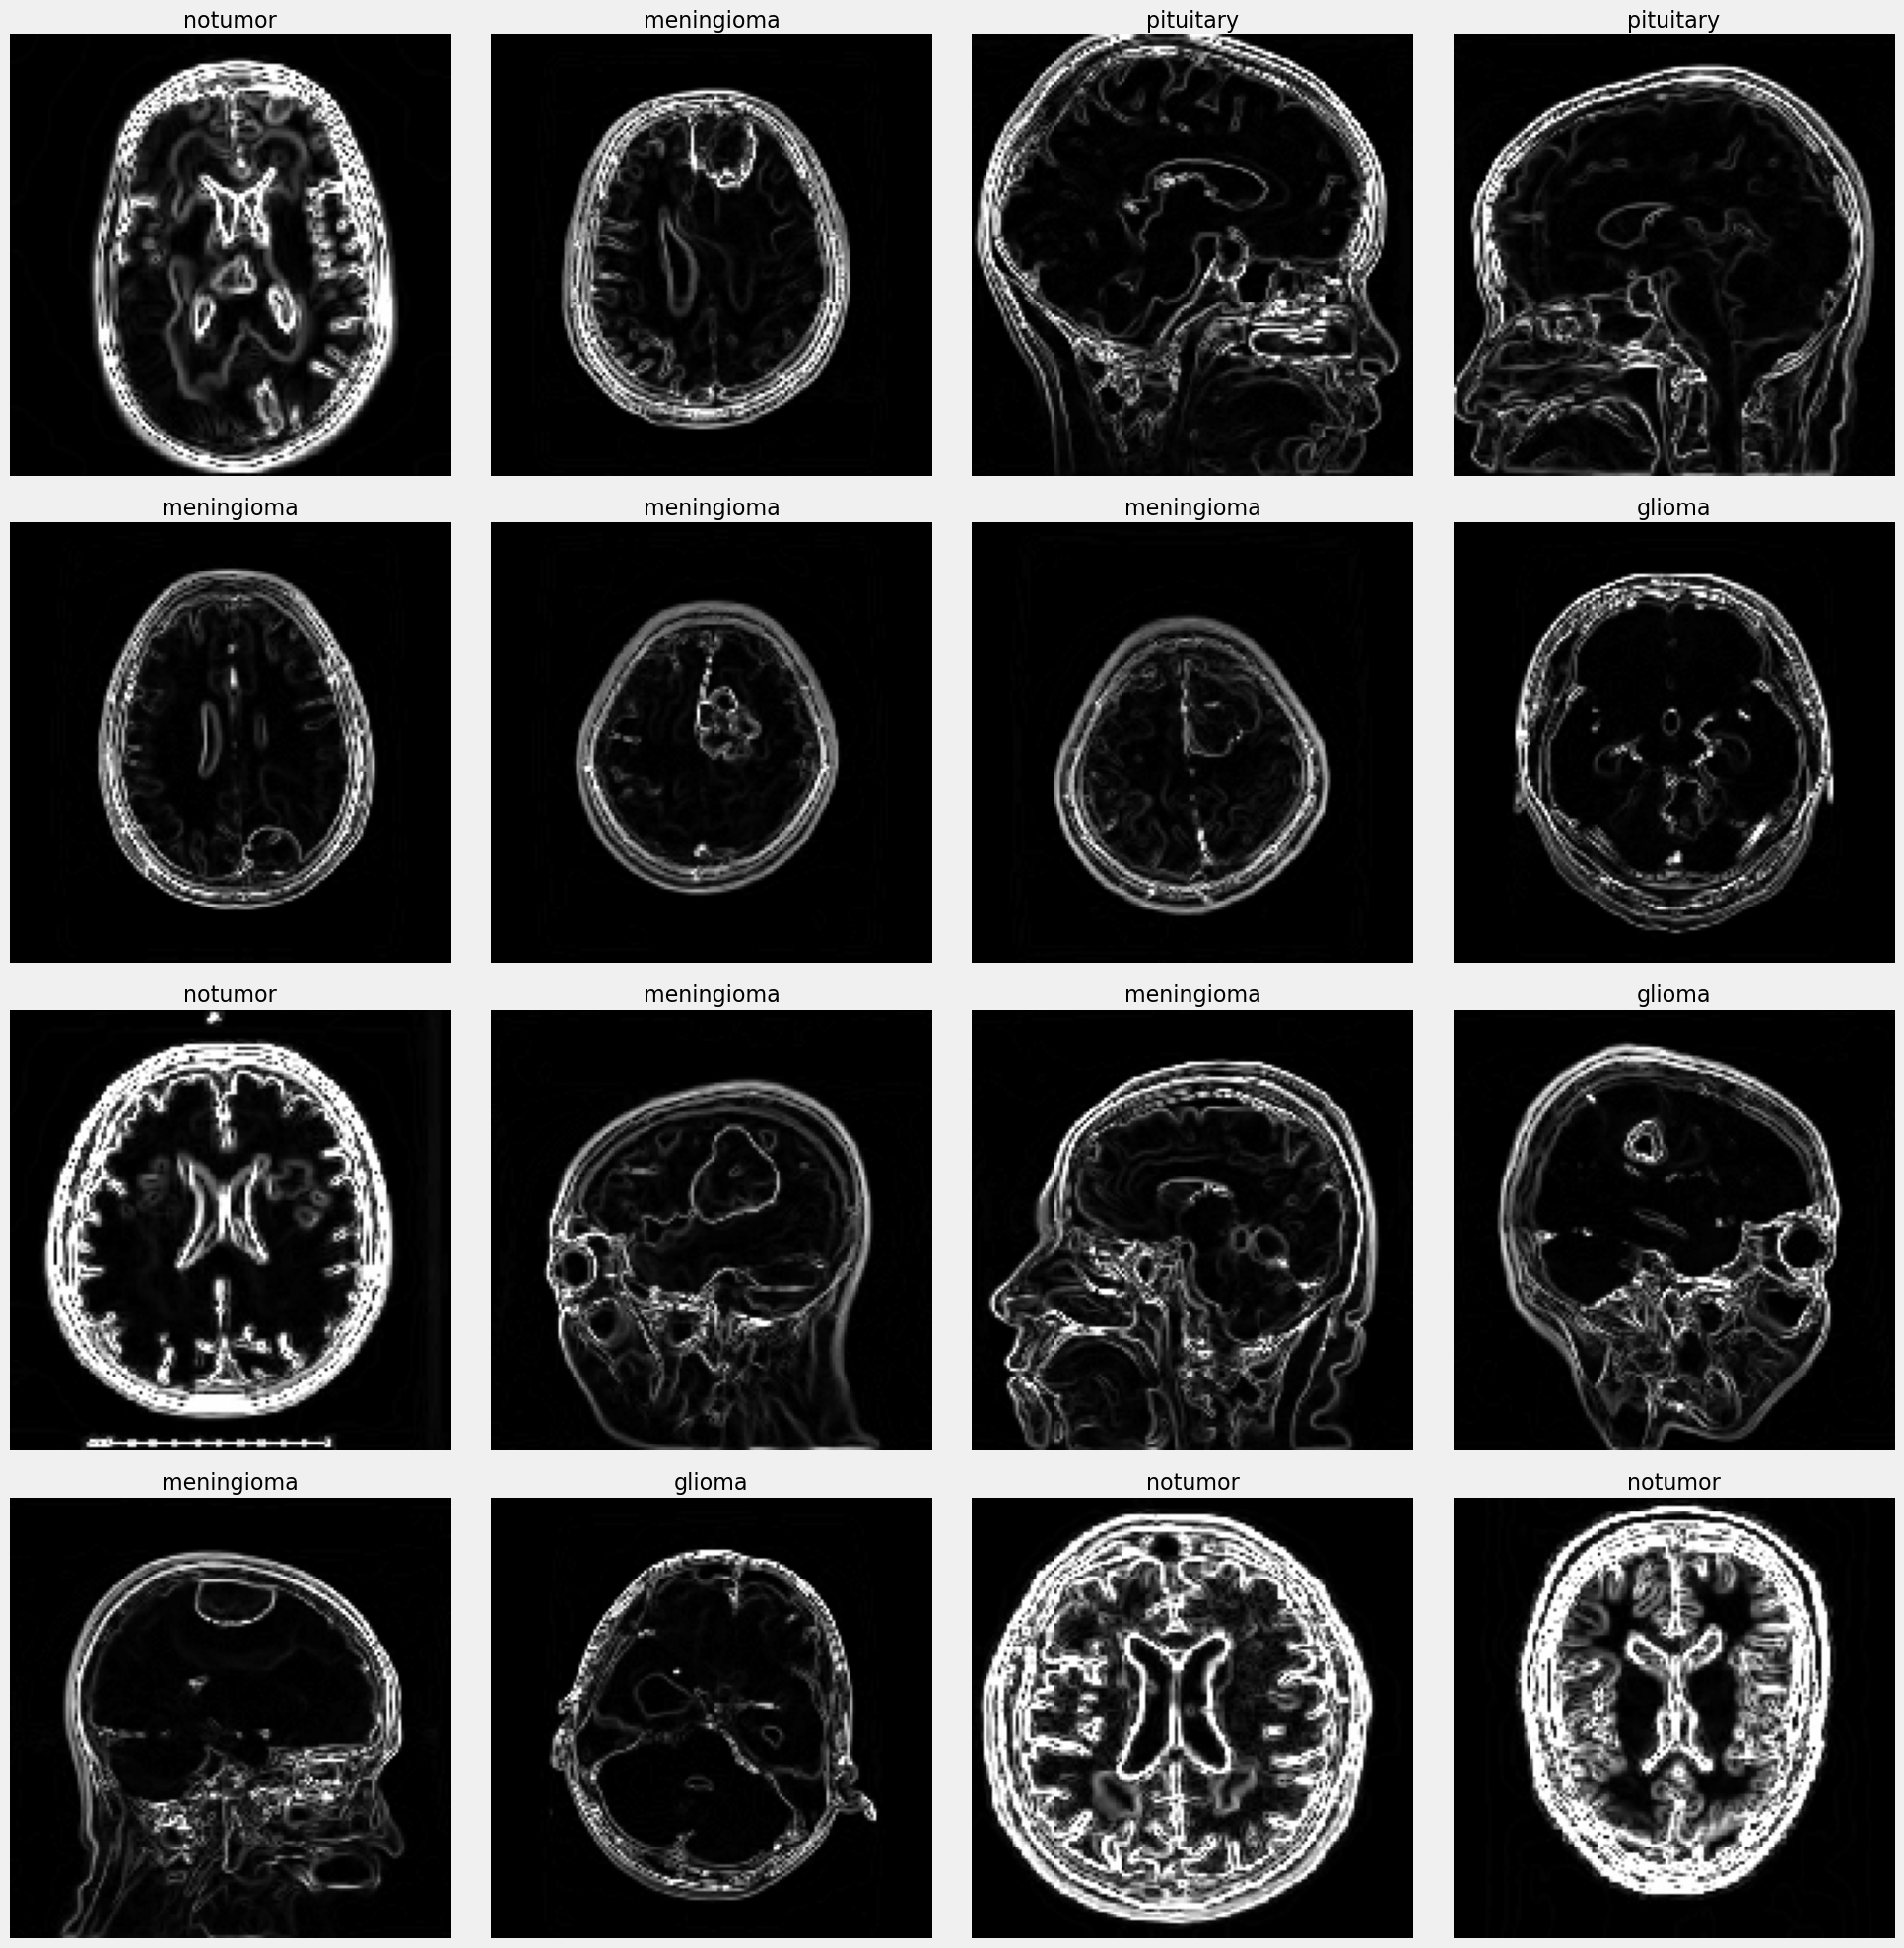

In [27]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator
# # difference between next iterator and for iterator


plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'black', fontsize= 16)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Training model with 7k images dataset

In [28]:
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [29]:
channels = 3
img_shape = (150, 150, channels)


class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

model_7k = Sequential()

model_7k.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape))
model_7k.add(MaxPooling2D())
    
model_7k.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model_7k.add(MaxPooling2D())
    
model_7k.add(Flatten())
    
model_7k.add(Dense(64,activation = "relu"))
model_7k.add(Dense(32,activation = "relu"))
model_7k.add(Dense(class_count, activation = "softmax"))

In [30]:
model_7k.compile(Adam(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model_7k.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 87616)             0         
                                                                 
 dense_5 (Dense)             (None, 64)               

In [31]:
epochs = 10   # number of all epochs in training

history_7k = model_7k.fit(train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/10


2024-05-05 11:49:01.946397: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


357/357 [==============================] - ETA: 0s - loss: 4.1578 - accuracy: 0.7120

2024-05-05 11:49:27.968922: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


357/357 [==============================] - 27s 75ms/step - loss: 4.1578 - accuracy: 0.7120 - val_loss: 0.4008 - val_accuracy: 0.8427
Epoch 2/10
357/357 [==============================] - 27s 75ms/step - loss: 0.1881 - accuracy: 0.9361 - val_loss: 0.2346 - val_accuracy: 0.9130
Epoch 3/10
357/357 [==============================] - 27s 76ms/step - loss: 0.0632 - accuracy: 0.9797 - val_loss: 0.3423 - val_accuracy: 0.9053
Epoch 4/10
357/357 [==============================] - 27s 76ms/step - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.3218 - val_accuracy: 0.9206
Epoch 5/10
357/357 [==============================] - 27s 75ms/step - loss: 0.0403 - accuracy: 0.9865 - val_loss: 0.2705 - val_accuracy: 0.9282
Epoch 6/10
357/357 [==============================] - 27s 75ms/step - loss: 0.0380 - accuracy: 0.9883 - val_loss: 0.3963 - val_accuracy: 0.9252
Epoch 7/10
357/357 [==============================] - 27s 75ms/step - loss: 0.0214 - accuracy: 0.9928 - val_loss: 0.3358 - val_accuracy: 0.9191
Epo

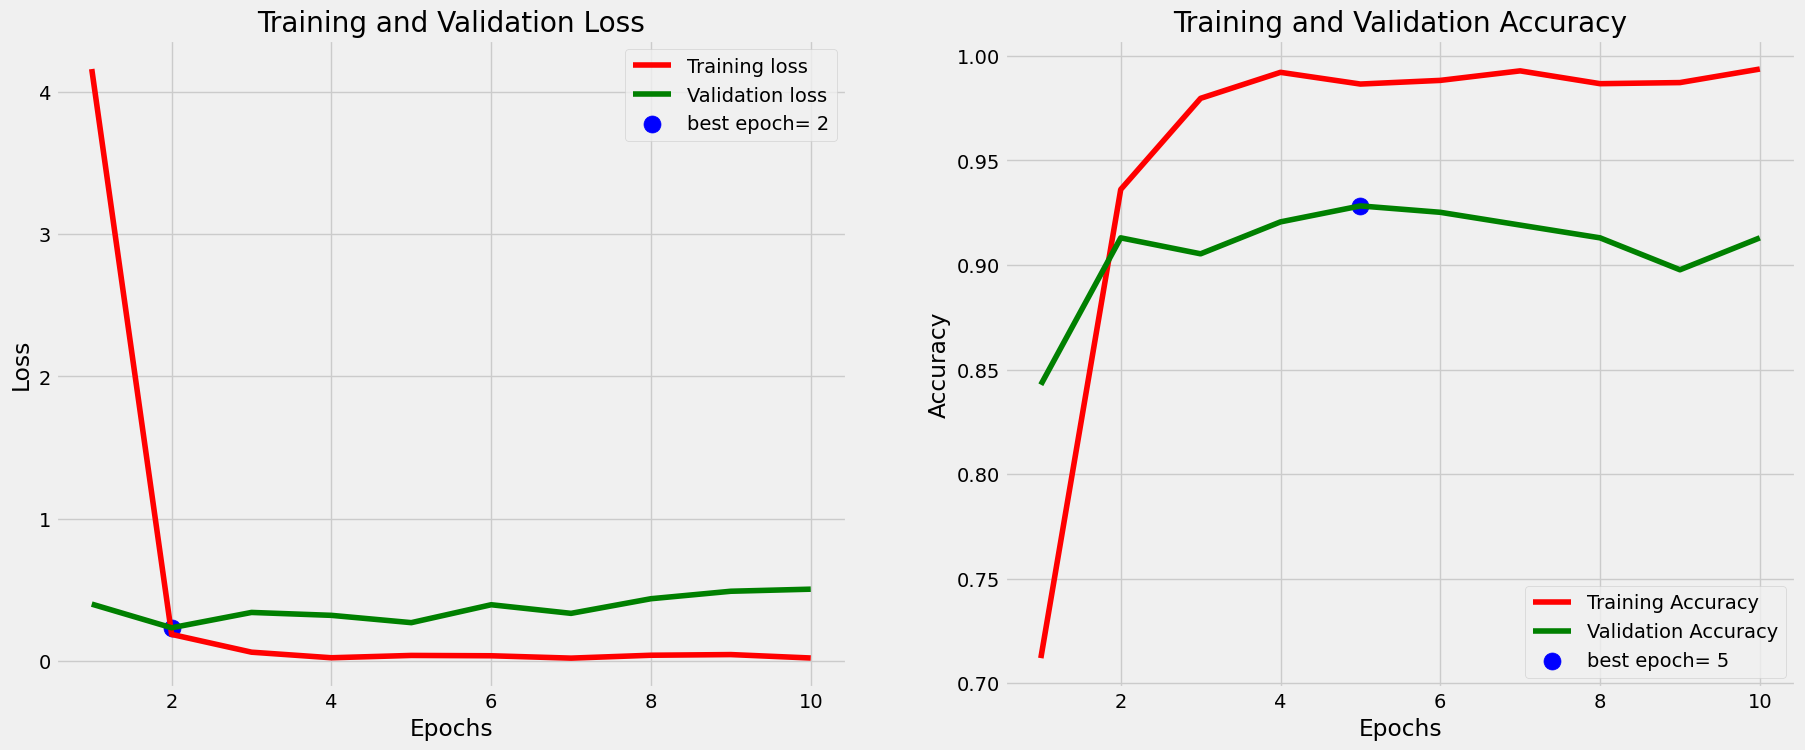

In [32]:
# Define needed variables
tr_acc = history_7k.history['accuracy']
tr_loss = history_7k.history['loss']
val_acc = history_7k.history['val_accuracy']
val_loss = history_7k.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [33]:
train_score = model_7k.evaluate(train_gen, verbose= 1)
valid_score = model_7k.evaluate(valid_gen, verbose= 1)
test_score = model_7k.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

  5/357 [..............................] - ETA: 9s - loss: 4.6620e-04 - accuracy: 1.0000 

2024-05-05 11:53:31.190140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 5/41 [==>...........................] - ETA: 1s - loss: 0.6276 - accuracy: 0.9125

2024-05-05 11:53:41.070966: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 5/41 [==>...........................] - ETA: 1s - loss: 0.4575 - accuracy: 0.9250

2024-05-05 11:53:42.319747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


41/41 [==============================] - 1s 25ms/step - loss: 0.3208 - accuracy: 0.9329
Train Loss:  0.012150888331234455
Train Accuracy:  0.9954481720924377
--------------------
Validation Loss:  0.5055893063545227
Validation Accuracy:  0.9129770994186401
--------------------
Test Loss:  0.3207974135875702
Test Accuracy:  0.9329268336296082


In [34]:
preds = model_7k.predict(test_gen)  
y_pred = np.argmax(preds, axis=1) 

 5/41 [==>...........................] - ETA: 0s

2024-05-05 11:53:43.412782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


41/41 [==============================] - 1s 25ms/step


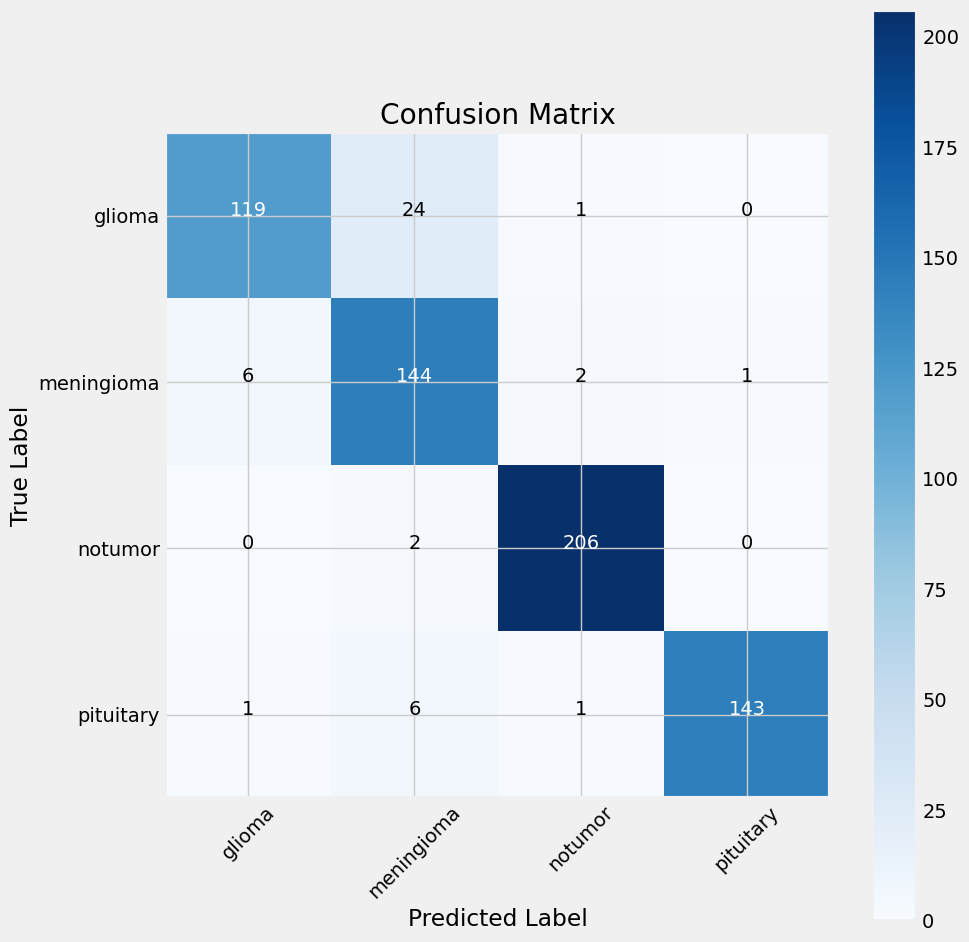

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
cm

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
    
    
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [36]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes)) 

#Save the model
model_7k.save('saved_models/CNN290424vol3_4classes.h5')

              precision    recall  f1-score   support

      glioma       0.94      0.83      0.88       144
  meningioma       0.82      0.94      0.88       153
     notumor       0.98      0.99      0.99       208
   pituitary       0.99      0.95      0.97       151

    accuracy                           0.93       656
   macro avg       0.93      0.93      0.93       656
weighted avg       0.94      0.93      0.93       656



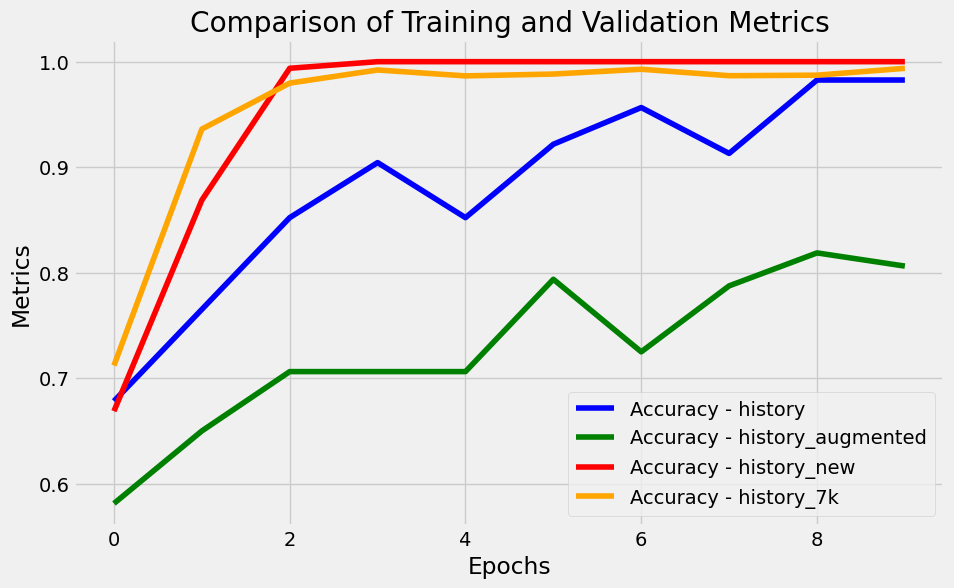

In [37]:
import matplotlib.pyplot as plt

# Define the metrics 
metrics = ['accuracy']

# Define the colors for each history
colors = ['blue', 'green', 'red', 'orange'] 

# Define the names of the histories
history_names = ['history', 'history_augmented', 'history_new', 'history_7k']

# Plotting
plt.figure(figsize=(10, 6))

# Plot each metric for each history
for i, history in enumerate([history, history_augmented, history_new, history_7k]):
    for j, metric in enumerate(metrics):
        plt.plot(history.history[metric], label=f'{metric.capitalize()} - {history_names[i]}', color=colors[i])

# Add legend, labels, and title
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Comparison of Training and Validation Metrics')

# Show plot
plt.show()


1/1 [==============================] - 0s 28ms/step


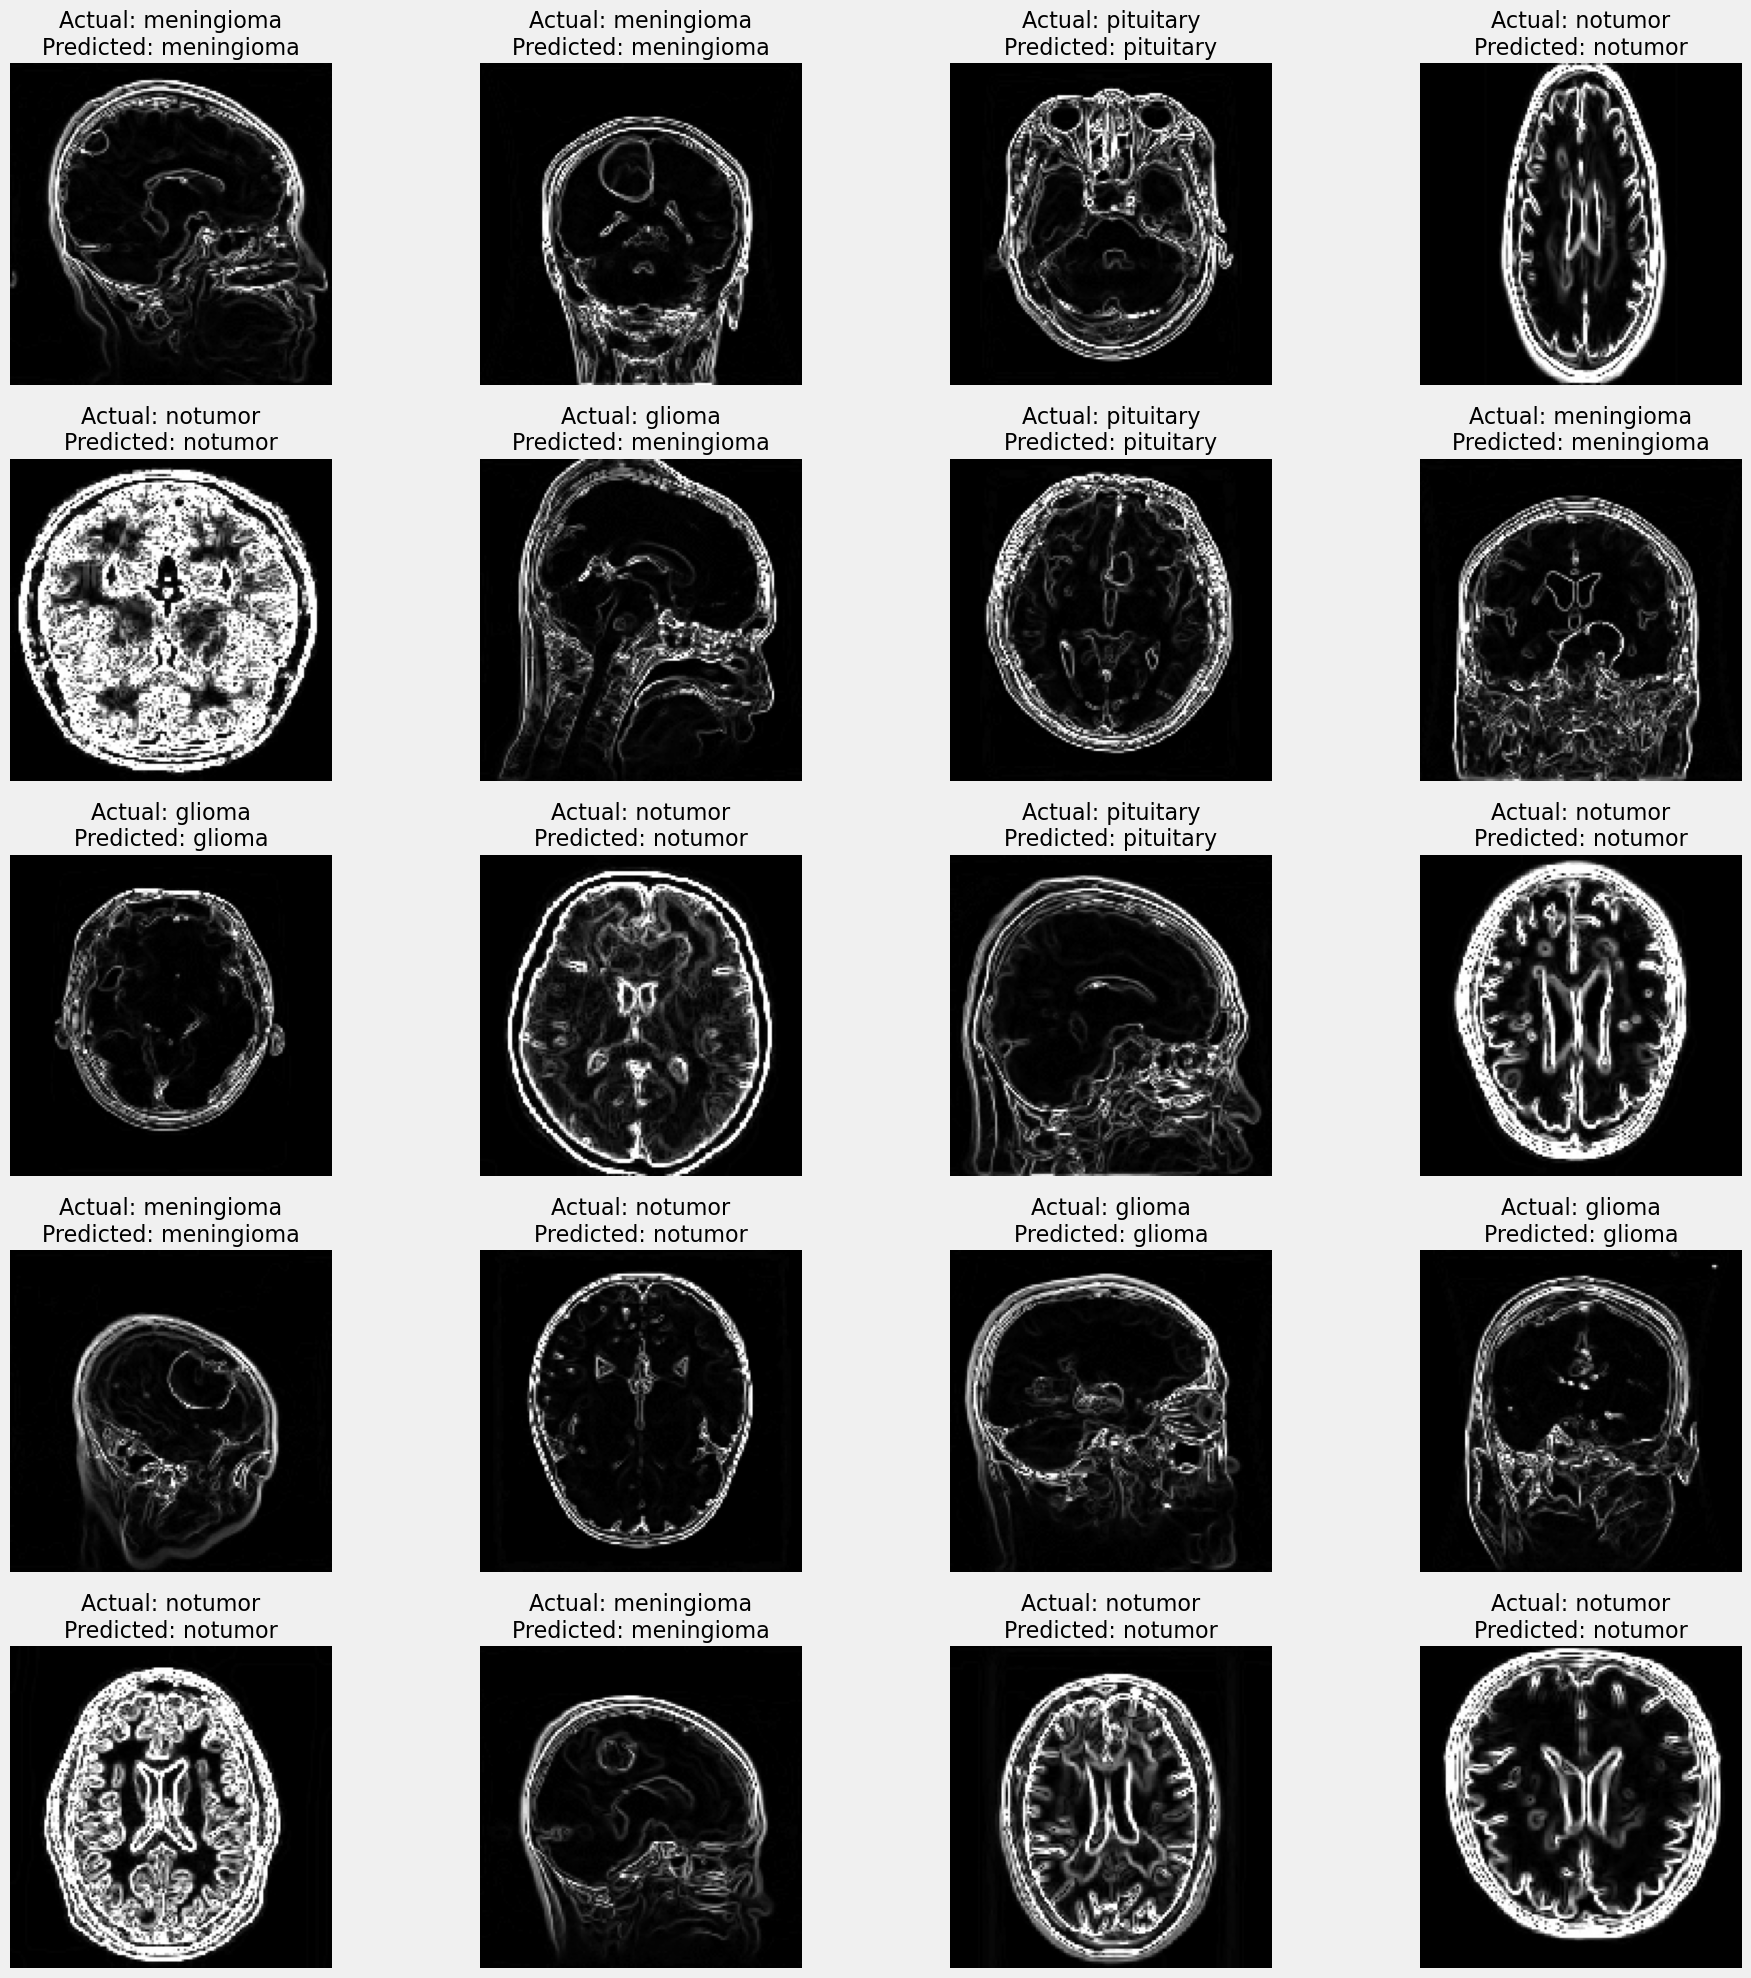

In [38]:
# Display 20 images with actual and predicted labels
plt.figure(figsize=(20, 20))

# Get 20 batches of images and labels from the test generator
for i in range(20):
    # Get a batch of images and labels from the generator
    images, labels = next(test_gen)
    
    # Predict labels for the images
    preds = model_7k.predict(images)
    predicted_labels = np.argmax(preds, axis=1)
    
    # Loop through each image in the batch
    for j in range(len(images)):
        # Calculate the subplot index
        subplot_index = i * len(images) + j + 1
        if subplot_index <= 20:  # Ensure we display only 20 images
            plt.subplot(5, 4, subplot_index)
            image = images[j] / 255  # Scale the image data to range (0 - 1)
            plt.imshow(image)
        
            # Get the actual and predicted labels for the current image
            actual_label_index = np.argmax(labels[j])
            predicted_label_index = predicted_labels[j]
        
            # Get the class names corresponding to the labels
            actual_class = classes[actual_label_index]
            predicted_class = classes[predicted_label_index]
        
            # Display the actual and predicted labels as titles
            title = f"Actual: {actual_class}\nPredicted: {predicted_class}"
            plt.title(title, color='black', fontsize=16)
            plt.axis('off')

plt.tight_layout()
plt.show()
